# Customer Churn Prediction using Ensemble Learning  
### IBM Telco Customer Dataset  

**Objective:**  
To build a professional, production-ready churn prediction model using:
- Exploratory Data Analysis (EDA)
- Feature understanding
- Correlation analysis
- Ensemble Learning
- Business interpretation



In [2]:
import sys
import subprocess

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

packages = [
    "pandas",
    "numpy",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "joblib"
]

for pkg in packages:
    try:
        __import__(pkg)
    except ImportError:
        install(pkg)


## 1. Import Required Libraries

In this section, we import all necessary libraries used for:
- Data handling
- Visualization
- Machine Learning
- Model persistence

This is the first step to ensure our environment is ready.


In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

import joblib


## 2. Load the Dataset

We load the IBM Telco Customer Churn dataset.
Before doing anything else, we must:
- Inspect column names
- Understand data shape
- Ensure dataset loaded correctly


In [27]:
df = pd.read_csv("../data/telco.csv")


In [28]:
df.head()


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [29]:
df.tail()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN
7042,3186-AJIEK,Male,44,No,No,No,No,0,United States,California,...,0,2043.36,8887.86,4,Stayed,No,38,5097,NaN,NaN


## 3. Understanding the Dataset Structure

From the first look (`df.head()`), we can observe:
- The dataset has **50 columns**, which is quite rich
- It includes:
  - Demographic data (Age, Gender, Senior Citizen)
  - Service usage data
  - Billing & revenue data
  - Satisfaction and churn-related information

Before moving forward, it is important to **standardize column names**.
This avoids bugs caused by:
- Extra spaces
- Inconsistent naming
- Difficulty while coding models


In [30]:
# Remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Remove spaces inside column names
df.columns = df.columns.str.replace(" ", "", regex=False)

df.columns


Index(['CustomerID', 'Gender', 'Age', 'Under30', 'SeniorCitizen', 'Married',
       'Dependents', 'NumberofDependents', 'Country', 'State', 'City',
       'ZipCode', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'ReferredaFriend', 'NumberofReferrals', 'TenureinMonths', 'Offer',
       'PhoneService', 'AvgMonthlyLongDistanceCharges', 'MultipleLines',
       'InternetService', 'InternetType', 'AvgMonthlyGBDownload',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan',
       'PremiumTechSupport', 'StreamingTV', 'StreamingMovies',
       'StreamingMusic', 'UnlimitedData', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue',
       'SatisfactionScore', 'CustomerStatus', 'ChurnLabel', 'ChurnScore',
       'CLTV', 'ChurnCategory', 'ChurnReason'],
      dtype='object')

## 4. Data Quality Check & Target Variable Understanding

Before modeling, we must answer three critical questions:
1. How big is the dataset?
2. Are there missing values?
3. What exactly is our target variable?

Skipping this step often leads to poor models and incorrect conclusions.



In [31]:
df.shape


(7043, 50)

In [32]:
df.isnull().sum().sort_values(ascending=False).head(10)


ChurnReason      5174
ChurnCategory    5174
Offer            3877
InternetType     1526
SeniorCitizen       0
Married             0
Age                 0
Under30             0
Country             0
State               0
dtype: int64

In [33]:
df['ChurnLabel'].value_counts()


ChurnLabel
No     5174
Yes    1869
Name: count, dtype: int64

In [34]:
df['ChurnLabel'].value_counts(normalize=True) * 100


ChurnLabel
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

## 5. Feature Selection using Human + Business Logic

At this stage, we **DO NOT jump to modeling**.

First, we must ask:
❓ "Which features are truly available BEFORE churn happens?"

Some columns in this dataset are:
- Direct outcomes of churn
- Post-churn information
- Or administrative identifiers

Using them would cause **data leakage**, leading to unrealistically high accuracy.

Such models FAIL in real-world deployment.


In [36]:
leakage_cols = [
    "CustomerStatus",   # Already tells churned or not
    "ChurnScore",       # Derived from churn
    "ChurnCategory",    # Reason after churn
    "ChurnReason"       # Reason after churn
]

df[leakage_cols].head()


,CustomerStatus,ChurnScore,ChurnCategory,ChurnReason
0,Churned,91,Competitor,Competitor offered more data
1,Churned,69,Competitor,Competitor made better offer
2,Churned,81,Competitor,Competitor made better offer
3,Churned,88,Dissatisfaction,Limited range of services
4,Churned,67,Price,Extra data charges


## 6. Exploratory Data Analysis (EDA)

EDA helps us answer **WHY customers churn**, not just WHETHER they churn.

In this section we will:
- Visualize churn patterns
- Identify strong churn drivers
- Build intuition before modeling

We will always compare features **against ChurnLabel**.


In [37]:
df.drop(columns=leakage_cols, inplace=True)


### 6.2 Churn Distribution

Before deep analysis, we visualize the overall churn ratio.
This tells us:
- Class imbalance
- Baseline business problem severity


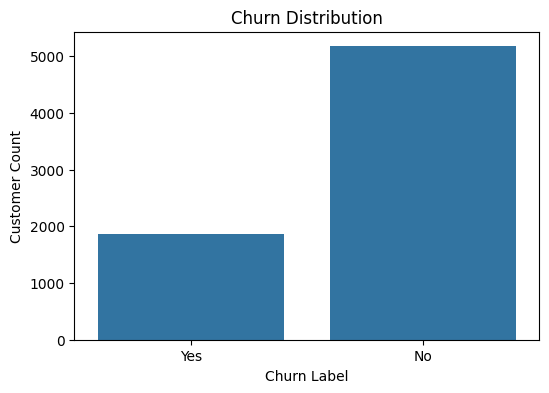

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x="ChurnLabel", data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn Label")
plt.ylabel("Customer Count")
plt.show()


### 6.3 Churn vs Contract Type

Contract duration is one of the strongest churn indicators.
Customers with short-term contracts usually churn more.


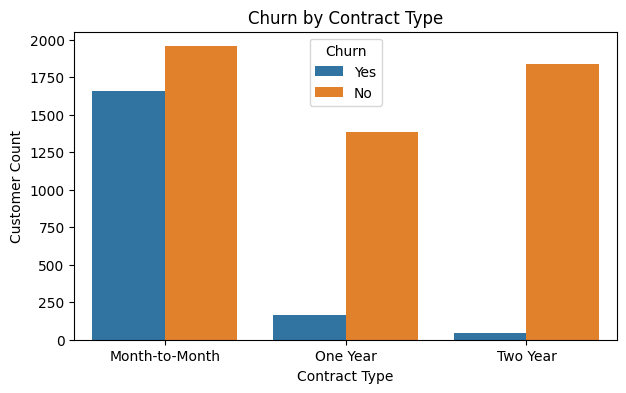

In [39]:
plt.figure(figsize=(7,4))
sns.countplot(x="Contract", hue="ChurnLabel", data=df)
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Customer Count")
plt.legend(title="Churn")
plt.show()


### 6.4 Churn vs Tenure

Tenure shows customer loyalty.
Low tenure customers are generally at higher churn risk.


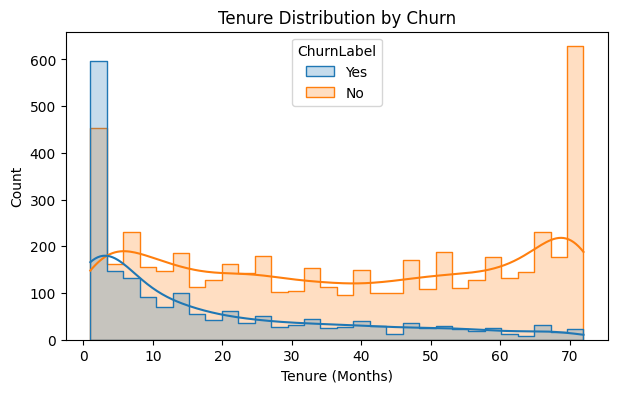

In [40]:
plt.figure(figsize=(7,4))
sns.histplot(
    data=df,
    x="TenureinMonths",
    hue="ChurnLabel",
    bins=30,
    kde=True,
    element="step"
)
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()


### 6.5 Churn vs Monthly Charges

High monthly charges often increase churn probability,
especially when value perception is low.


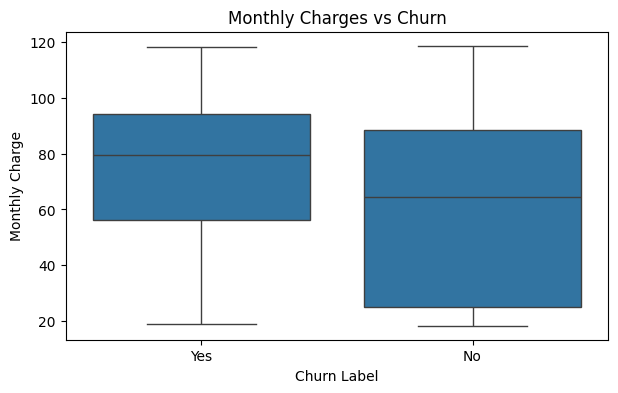

In [41]:
plt.figure(figsize=(7,4))
sns.boxplot(x="ChurnLabel", y="MonthlyCharge", data=df)
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn Label")
plt.ylabel("Monthly Charge")
plt.show()


### 6.6 Satisfaction Score vs Churn

Satisfaction score is a direct signal of customer experience.
Lower scores should correlate with higher churn.


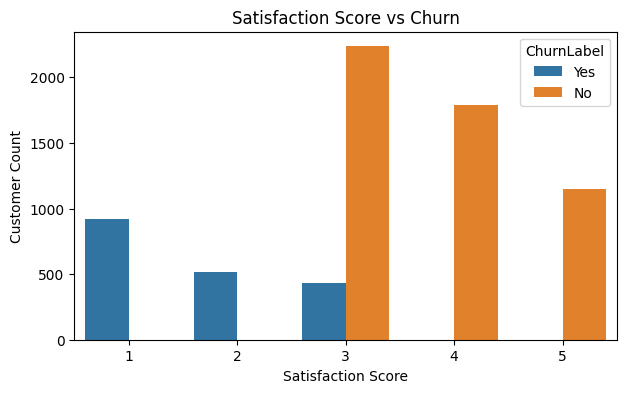

In [42]:
plt.figure(figsize=(7,4))
sns.countplot(x="SatisfactionScore", hue="ChurnLabel", data=df)
plt.title("Satisfaction Score vs Churn")
plt.xlabel("Satisfaction Score")
plt.ylabel("Customer Count")
plt.show()


## 7. Correlation Analysis (Numeric Features Only)

After visual EDA, we now analyze **numeric relationships mathematically**.

Why correlation?
- To identify strongly related features
- To detect redundancy (multicollinearity)
- To reduce noise before modeling

⚠️ Important:
Correlation is calculated ONLY on numeric features.
Categorical variables will be handled separately.


First, we isolate numeric features.
This avoids incorrect correlation values from categorical data.


In [43]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
numeric_df.columns


Index(['Age', 'NumberofDependents', 'ZipCode', 'Latitude', 'Longitude',
       'Population', 'NumberofReferrals', 'TenureinMonths',
       'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload',
       'MonthlyCharge', 'TotalCharges', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue',
       'SatisfactionScore', 'CLTV'],
      dtype='object')

Now we compute the correlation matrix using Pearson correlation.
This shows linear relationships between numeric variables.


In [44]:
corr_matrix = numeric_df.corr()
corr_matrix


,Age,NumberofDependents,ZipCode,Latitude,Longitude,Population,NumberofReferrals,TenureinMonths,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,CLTV
Age,1.000000,-0.119000,-0.008183,-0.010305,0.007612,-0.018881,-0.025141,0.009927,-0.011749,-0.376595,0.144685,0.059684,0.024168,0.025036,0.003065,0.048265,-0.085170,-0.001826
NumberofDependents,-0.119000,1.000000,0.016493,0.029081,-0.024271,-0.015486,0.278003,0.108237,-0.007324,0.129966,-0.131837,0.022535,0.014023,-0.014436,0.068966,0.038038,0.152873,0.049611
ZipCode,-0.008183,0.016493,1.000000,0.894769,-0.790564,-0.424067,0.001463,0.007146,0.005894,-0.010998,-0.010775,0.001978,-0.003797,-0.014550,0.005063,0.002944,0.002121,-0.003207
Latitude,-0.010305,0.029081,0.894769,1.000000,-0.885979,-0.434801,0.018715,0.011963,0.002631,-0.027676,-0.030325,-0.002784,-0.009901,-0.013233,0.008029,0.000082,0.022367,0.000214
Longitude,0.007612,-0.024271,-0.790564,-0.885979,1.000000,0.296288,-0.009893,-0.009672,-0.004341,0.030979,0.028429,0.003811,-0.000597,0.010461,-0.006923,0.001062,-0.009048,-0.000513
Population,-0.018881,-0.015486,-0.424067,-0.434801,0.296288,1.000000,-0.007704,-0.012102,-0.018665,0.024759,0.009597,-0.006434,0.019627,0.012031,-0.018640,-0.010546,-0.031056,-0.000648
NumberofReferrals,-0.025141,0.278003,0.001463,0.018715,-0.009893,-0.007704,1.000000,0.326975,0.006336,0.038575,0.028173,0.250378,0.024756,0.000350,0.216190,0.261853,0.188926,0.122843
TenureinMonths,0.009927,0.108237,0.007146,0.011963,-0.009672,-0.012102,0.326975,1.000000,0.014596,0.049119,0.247582,0.826074,0.059021,0.082266,0.674149,0.853146,0.210557,0.396292
AvgMonthlyLongDistanceCharges,-0.011749,-0.007324,0.005894,0.002631,-0.004341,-0.018665,0.006336,0.014596,1.000000,-0.030455,0.138396,0.069500,-0.018644,0.002414,0.599828,0.232291,0.001146,0.023858
AvgMonthlyGBDownload,-0.376595,0.129966,-0.010998,-0.027676,0.030979,0.024759,0.038575,0.049119,-0.030455,1.000000,0.391787,0.223268,0.002397,0.088939,0.011373,0.180726,-0.091657,0.023043


A heatmap makes correlation patterns visually clear.
We focus on:
- Strong positive correlations
- Strong negative correlations
- Correlation with target variable (ChurnLabel)


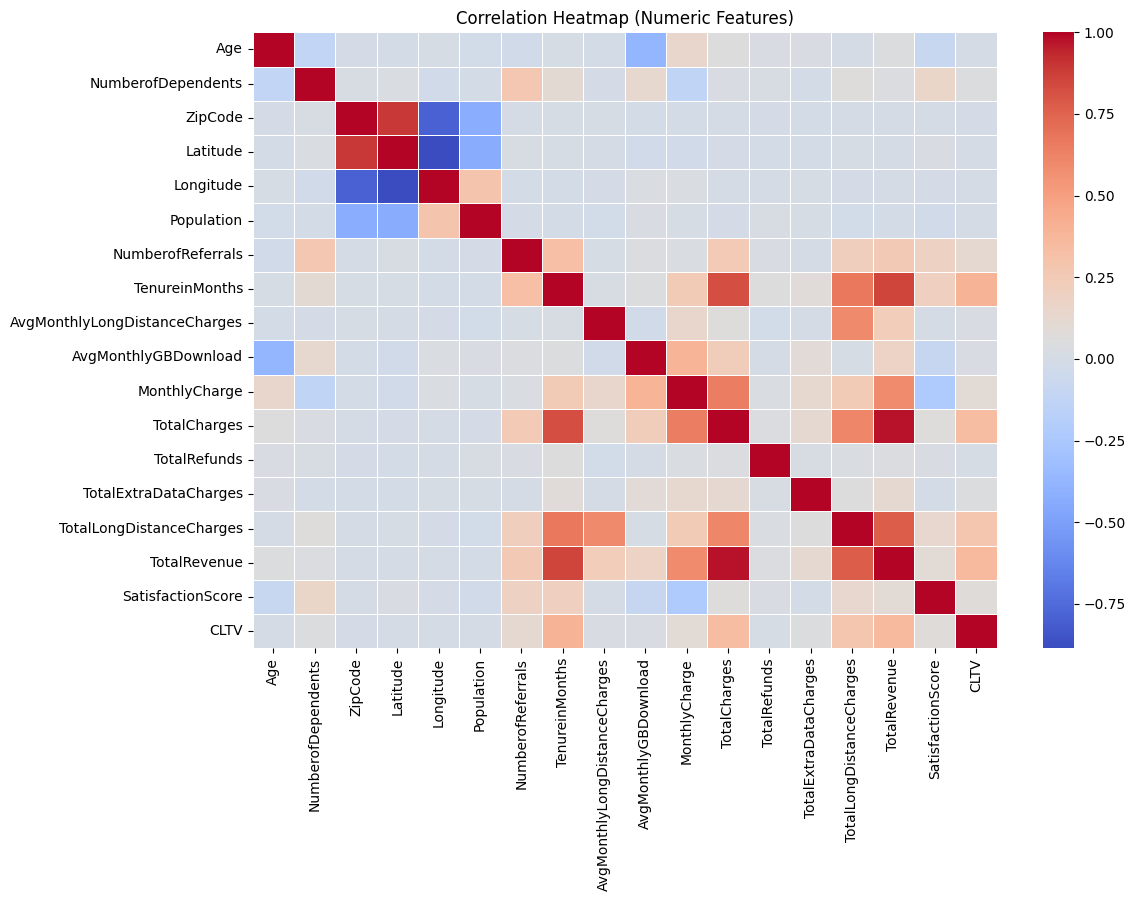

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


## 8. Final Feature Preparation

At this stage:
- We understand the data
- We removed leakage
- We validated churn drivers
- We analyzed correlations

Now the goal is simple:
➡️ Prepare a **clean, realistic, model-ready dataset**

Before modeling, we must:
1. Remove redundant numeric features
2. Decide which correlated features to keep
3. Encode categorical variables
4. Separate features and target


From correlation analysis, we observe:

- TotalCharges ↔ TotalRevenue (corr ≈ 0.97)
- TenureinMonths ↔ TotalCharges (corr ≈ 0.83)
- TenureinMonths ↔ TotalRevenue (corr ≈ 0.85)
- ZipCode ↔ Latitude/Longitude (very high)

Keeping all of them adds redundancy.
We retain features that are:
- More interpretable
- Available pre-churn


We will:
Keep: TenureinMonths, MonthlyCharge  
 Drop: TotalCharges, TotalRevenue  

Reason:
Tenure + MonthlyCharge already explain customer value.


In [46]:
redundant_numeric_cols = [
    "TotalCharges",
    "TotalRevenue"
]

df.drop(columns=redundant_numeric_cols, inplace=True)


ZipCode, Latitude, and Longitude are highly correlated
and do not add behavioral insight.

They increase noise and reduce generalization.


In [47]:
geo_numeric_cols = ["ZipCode", "Latitude", "Longitude"]

df.drop(columns=geo_numeric_cols, inplace=True)


After removing redundant features, we re-check
the dataset shape and columns.


In [48]:
df.shape


(7043, 41)

In [49]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Under30', 'SeniorCitizen', 'Married',
       'Dependents', 'NumberofDependents', 'Country', 'State', 'City',
       'Population', 'Quarter', 'ReferredaFriend', 'NumberofReferrals',
       'TenureinMonths', 'Offer', 'PhoneService',
       'AvgMonthlyLongDistanceCharges', 'MultipleLines', 'InternetService',
       'InternetType', 'AvgMonthlyGBDownload', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtectionPlan', 'PremiumTechSupport',
       'StreamingTV', 'StreamingMovies', 'StreamingMusic', 'UnlimitedData',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharge',
       'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges',
       'SatisfactionScore', 'ChurnLabel', 'CLTV'],
      dtype='object')

Our target variable `ChurnLabel` is categorical.
We convert it into binary format:
Yes → 1, No → 0


In [50]:
df["ChurnLabel"] = df["ChurnLabel"].map({"Yes": 1, "No": 0})


Machine learning models require numeric inputs.
We encode categorical variables using Label Encoding.

This is acceptable here because:
- Categories are nominal
- Tree-based models are robust to label encoding


In [51]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include="object").columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


Now we separate:
- X → Features
- y → Target (ChurnLabel)

This is the final dataset used for modeling.


In [52]:
X = df.drop("ChurnLabel", axis=1)
y = df["ChurnLabel"]


## 9. Model Training – Baseline Model

Before jumping into ensemble learning, it is a best practice to:
- Train a simple baseline model
- Establish a performance benchmark
- Understand model behavior and limitations

We start with **Logistic Regression** because:
- It is interpretable
- It performs well on binary classification
- It gives us a strong baseline for comparison



We split the dataset into training and testing sets.

Why stratified split?
- Our dataset is imbalanced (~26% churn)
- Stratification preserves churn ratio in both sets


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


We train Logistic Regression with class weights.

Why class_weight="balanced"?
- Penalizes mistakes on minority (churn) class
- Improves recall for churned customers


In [54]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_model.fit(X_train, y_train)


c:\Users\visha\OneDrive\Desktop\churnmodel\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

We generate predictions and probabilities.
Probabilities are important for business decisions.


In [55]:
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]


Accuracy alone is misleading for churn problems.

We evaluate using:
- Confusion Matrix
- Classification Report
- ROC-AUC Score


In [56]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.8814762242725337

Confusion Matrix:
 [[914 121]
 [ 46 328]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      1035
           1       0.73      0.88      0.80       374

    accuracy                           0.88      1409
   macro avg       0.84      0.88      0.86      1409
weighted avg       0.89      0.88      0.88      1409

ROC-AUC Score: 0.956320235604123


### Business Interpretation of Baseline Model

- Recall for churn class is more important than accuracy
- Missing a churned customer is costlier than false alarms
- Logistic Regression gives us a transparent benchmark

This baseline helps us measure how much value
ensemble learning adds later.


In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]


In [58]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("RF ROC-AUC:", roc_auc_score(y_test, rf_prob))


Random Forest Confusion Matrix:
 [[1014   21]
 [  36  338]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1035
           1       0.94      0.90      0.92       374

    accuracy                           0.96      1409
   macro avg       0.95      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409

RF ROC-AUC: 0.986835102947635


In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)
gb_prob = gb_model.predict_proba(X_test)[:, 1]


In [60]:
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))
print("GB ROC-AUC:", roc_auc_score(y_test, gb_prob))


Gradient Boosting Confusion Matrix:
 [[1025   10]
 [  40  334]]

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1035
           1       0.97      0.89      0.93       374

    accuracy                           0.96      1409
   macro avg       0.97      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409

GB ROC-AUC: 0.9925107856054147


In [61]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[
        ("lr", log_model),
        ("rf", rf_model),
        ("gb", gb_model)
    ],
    voting="soft",
    weights=[1, 2, 2]   # RF & GB ko zyada importance
)

voting_model.fit(X_train, y_train)

vote_pred = voting_model.predict(X_test)
vote_prob = voting_model.predict_proba(X_test)[:, 1]


c:\Users\visha\OneDrive\Desktop\churnmodel\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
print("Voting Classifier Confusion Matrix:\n", confusion_matrix(y_test, vote_pred))
print("\nVoting Classifier Report:\n", classification_report(y_test, vote_pred))
print("Voting ROC-AUC:", roc_auc_score(y_test, vote_prob))


Voting Classifier Confusion Matrix:
 [[1017   18]
 [  38  336]]

Voting Classifier Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1035
           1       0.95      0.90      0.92       374

    accuracy                           0.96      1409
   macro avg       0.96      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409

Voting ROC-AUC: 0.9896148182593196


In [64]:
# 🔐 SAVE FINAL FEATURE NAMES
final_feature_names = X.columns.tolist()

import joblib
joblib.dump(final_feature_names, "../model/feature_names.pkl")


['../model/feature_names.pkl']

In [65]:
joblib.dump(voting_model, "../model/churn_model.pkl")


['../model/churn_model.pkl']

In [67]:
import joblib
import os

# Ensure model directory exists
os.makedirs("../model", exist_ok=True)

# Save final feature names
joblib.dump(X.columns.tolist(), "../model/feature_names.pkl")

# Save final ensemble model
joblib.dump(voting_model, "../model/churn_model.pkl")

print("✅ Model and feature names saved successfully!")


✅ Model and feature names saved successfully!
